# Pytorch dataloaders for echocardiography

Miguel Xochicale [@mxochicale](https://github.com/mxochicale)  
Dec 2021


## Introduction
This notebook presents prototypes to pre-process echocardiography datasets with the use of pytorch features. 

## Running notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
## References
* NVIDIA Data Loading Library (DALI): https://github.com/NVIDIA/DALI/tree/main/docs/examples/sequence_processing Added: Mon 13 Dec 09:22:05 GMT 2021



## Jupyter Notebook

### Setting imports and datasets paths

In [1]:
import argparse
import yaml
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torch.utils.data import DataLoader
from source.dataloaders.EchocardiographicVideoDataset import EchoViewVideoDataset

YML_FILE = '/home/mx19/repositories/echocardiography/scripts/config_files/config_4cv.yml'    
with open(YML_FILE, 'r') as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

### Setting pytorch datasets

In [2]:
dataset = EchoViewVideoDataset(config['participant_videos_path'], config['participant_path_json_files'])

video_index = 1
data = dataset[video_index]
print(f' {type(data)}, {data.size()} ')


  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T2/01NVb-003-072-2-echo-cont.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=20130 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T2_4CV.json
  number_of_labelled_clips=3
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20130/20130 [00:48<00:00, 417.81it/s]


Function '__getitem__' executed in 48.6036s
 <class 'torch.Tensor'>, torch.Size([359, 3, 1080, 1920]) 


### Using dataloader with pre-processing image techniques

 359 


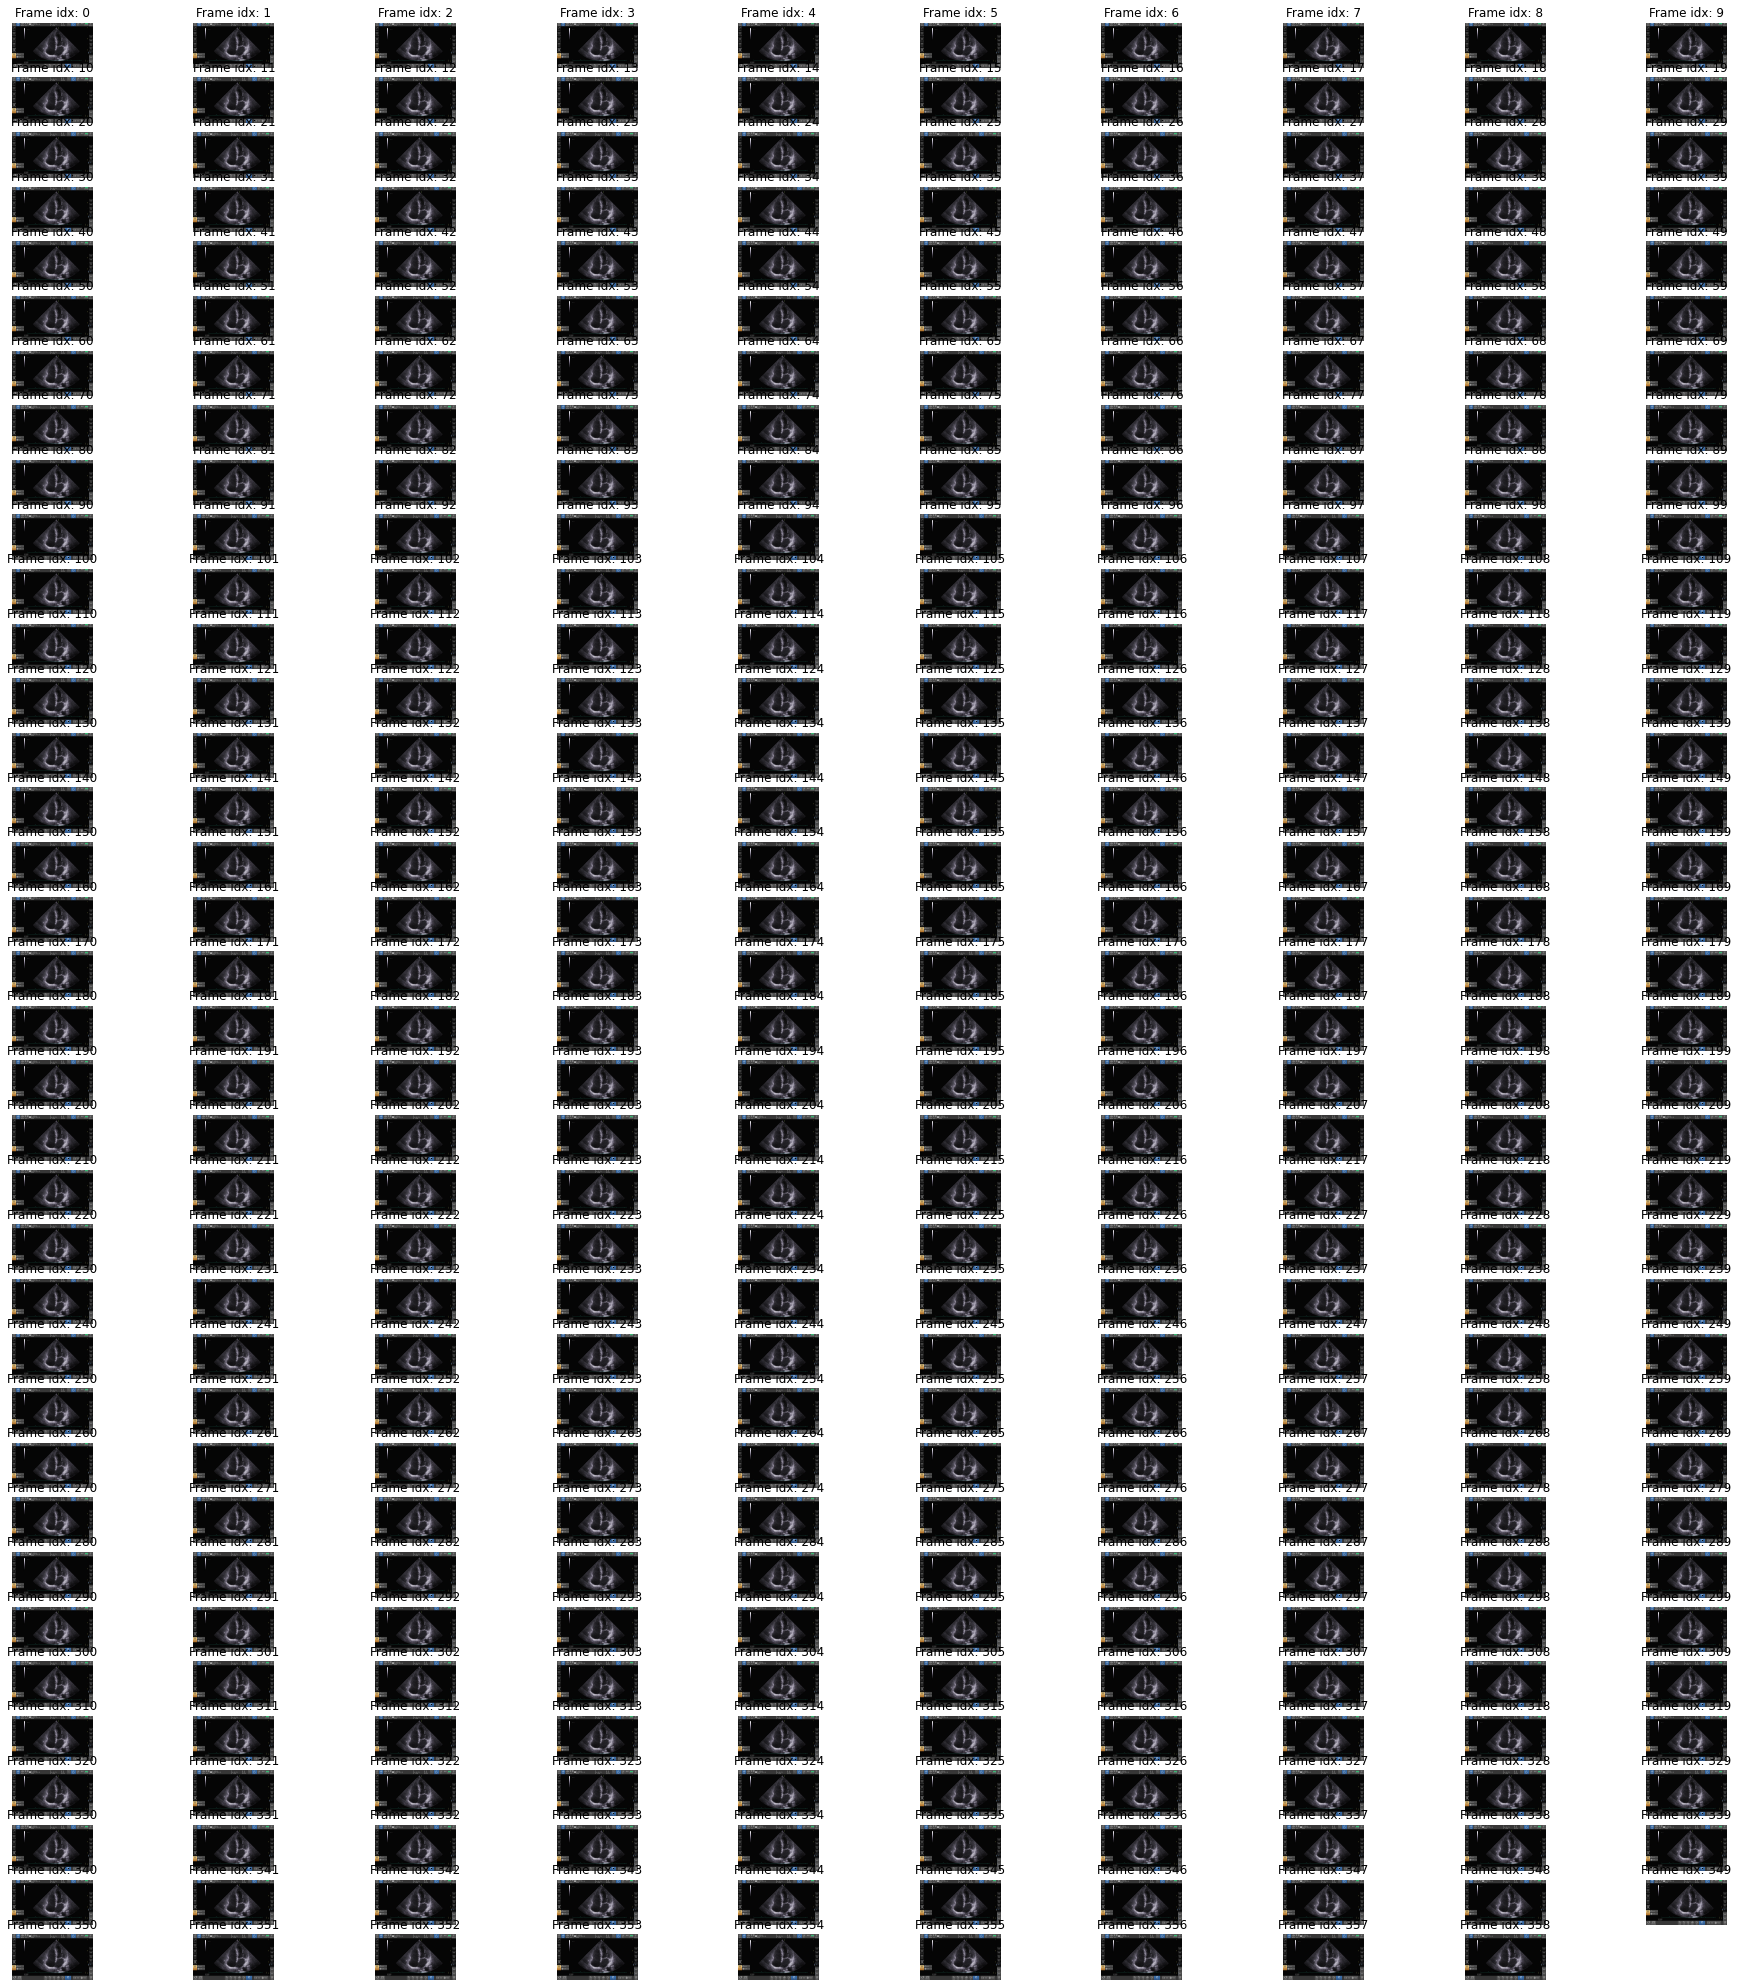

In [70]:
dataloader = DataLoader(data,
                    batch_size=1,
                    shuffle=False,
                    num_workers=0,
                    pin_memory=True
                    )
length_of_dl=len(dataloader)
print(f' {length_of_dl} ')

columns = 10
rows = (length_of_dl + 1) // (columns)
fig = plt.figure(figsize = (32, (16 // columns) * rows))
gs = gridspec.GridSpec(rows, columns)

for (idx, batch) in enumerate(my_dloader):
#     print(f' Index: {idx}')
#     print(f' Batch: {batch}')
#     print(f' {type(batch)}, {batch.size()} ')
#     print(f' {batch.permute(2,3,1,0).size()} ')
#     imgs = batch.permute(2,3,1,0)
    imgs_flatten = torch.flatten(imgs,2)
    # print(f'{imgs_flatten.size()}')
    plt.subplot(gs[idx])
    plt.axis("off")
    plt.title('Frame idx: {}'.format(idx)) 
    plt.imshow(imgs_flatten)

    
    
# plt.show()
    
    
    
